<a href="https://colab.research.google.com/github/italojsr/Block-diagram-reduction/blob/main/C%C3%B3digoFuncaoTransfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install control


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.6/549.6 kB 7.2 MB/s eta 0:00:00


In [1]:
import control as ctrl
import matplotlib.pyplot as plt
import networkx as nx

# Blocos criados
blocos = {}

# Conexões feitas
conexoes = []

def criar_bloco():
    print("\n=== Criar Novo Bloco ===")
    print("Digite o nome do bloco (ex: G1):")
    nome = input()

    print("Digite o numerador separado por espaços (ex: para s+2, digite '1 2'):")
    num = input().split()

    print("Digite o denominador separado por espaços (ex: para s+3, digite '1 3'):")
    den = input().split()

    num = [float(i) for i in num]
    den = [float(i) for i in den]

    blocos[nome] = ctrl.TransferFunction(num, den)
    print(f"Bloco {nome} criado com sucesso!\n")

def conectar_blocos():
    print("\n=== Conectar Blocos ===")
    print(f"Blocos disponíveis: {list(blocos.keys())}")

    print("Escolha o primeiro bloco:")
    b1 = input()

    print("Escolha o segundo bloco:")
    b2 = input()

    print("Tipo de conexão (serie / paralelo / feedback):")
    tipo = input().lower()

    if tipo == "serie":
        novo = ctrl.series(blocos[b1], blocos[b2])
        conexoes.append((b1, b2, 'serie'))
    elif tipo == "paralelo":
        novo = ctrl.parallel(blocos[b1], blocos[b2])
        conexoes.append((b1, b2, 'paralelo'))
    elif tipo == "feedback":
        print("Realimentação positiva ou negativa? (pos / neg):")
        sinal = input().lower()
        sign = 1 if sinal == "pos" else -1
        novo = ctrl.feedback(blocos[b1], blocos[b2], sign=sign)
        conexoes.append((b1, b2, f'feedback {sinal}'))
    else:
        print("Tipo de conexão inválido!")
        return

    print("Digite o nome do novo bloco resultante:")
    nome_novo = input()

    blocos[nome_novo] = novo
    print(f"Novo bloco {nome_novo} criado com sucesso!\n")

def mostrar_blocos():
    print("\n=== Diagrama Atual (Texto) ===")
    for nome, bloco in blocos.items():
        print(f"{nome}: {bloco}")
    print("======================\n")

"""
def plotar_resposta():
    print("\n=== Simular Resposta ao Degrau ===")
    print("Digite o nome do bloco final para simular a resposta:")
    nome = input()

    if nome in blocos:
        t, y = ctrl.step_response(blocos[nome])
        plt.plot(t, y)
        plt.title(f'Resposta ao Degrau - {nome}')
        plt.xlabel('Tempo (s)')
        plt.ylabel('Saída')
        plt.grid()
        plt.show()
    else:
        print("Bloco não encontrado!")
"""

"""
def plotar_resposta():
    print("\n=== Simular Resposta ao Degrau ===")

    if not blocos:
        print("Nenhum bloco disponível. Crie um bloco primeiro.")
        return

    print("Digite o nome do bloco final para simular a resposta:")
    for nome in blocos:
        print(f" - {nome}")

    nome = input("Nome do bloco: ").strip()

    if nome in blocos:
        print(f"\nFunção de Transferência do bloco '{nome}':")
        print(blocos[nome])

        t, y = ctrl.step_response(blocos[nome])
        plt.plot(t, y)
        plt.title(f'Resposta ao Degrau - {nome}')
        plt.xlabel('Tempo (s)')
        plt.ylabel('Saída')
        plt.grid()
        plt.show()
    else:
        print("Bloco não encontrado!")

"""
import matplotlib.pyplot as plt
import control as ctrl
import os

def plotar_resposta():
    print("\n=== Simular Resposta ao Degrau ===")

    if not blocos:
        print("Nenhum bloco foi criado ainda.")
        return

    nomes_blocos = list(blocos.keys())

    print("\nBlocos disponíveis:")
    for i, nome in enumerate(nomes_blocos, 1):
        print(f"  {i}. {nome}")

    print("\nDigite o número ou nome do bloco desejado (ou 'voltar' para retornar):")
    escolha = input(">> ").strip()

    if escolha.lower() == 'voltar':
        return

    if escolha.isdigit():
        indice = int(escolha) - 1
        if 0 <= indice < len(nomes_blocos):
            nome = nomes_blocos[indice]
        else:
            print("Número inválido.")
            return
    else:
        nome = escolha
        if nome not in blocos:
            print("Nome de bloco não encontrado.")
            return

    sistema = blocos[nome]
    tf = ctrl.tf(sistema)

    print(f"\nFunção de Transferência do bloco '{nome}':\n")
    print(tf)

    t, y = ctrl.step_response(sistema)

    # Criar pasta se não existir
    pasta_resultados = "graficos_resposta"
    os.makedirs(pasta_resultados, exist_ok=True)
    caminho_arquivo = os.path.join(pasta_resultados, f"resposta_{nome}.png")

    # Plot e salvar
    plt.figure()
    plt.plot(t, y, label=f'{nome}')
    plt.title(f'Resposta ao Degrau - {nome}')
    plt.xlabel('Tempo (s)')
    plt.ylabel('Saída')
    plt.legend()
    plt.grid(True)
    plt.savefig(caminho_arquivo)
    plt.show()

    print(f"\nGráfico salvo em: {caminho_arquivo}")




def menu():
    while True:
        print("\n====== MENU ======")
        print("1. Criar novo bloco")
        print("2. Conectar blocos")
        print("3. Mostrar blocos (texto)")
        print("4. Simular resposta ao degrau")
        print("5. Sair")
        print("Escolha uma opção:")
        escolha = input()

        if escolha == "1":
            criar_bloco()
        elif escolha == "2":
            conectar_blocos()
        elif escolha == "3":
            mostrar_blocos()
        elif escolha == "4":
            plotar_resposta()
        elif escolha == "5":
            print("Saindo...")
            break
        else:
            print('Escolha uma opção válida')


====== MENU ======
1. Criar novo bloco
2. Conectar blocos
3. Mostrar blocos (texto)
4. Simular resposta ao degrau
5. Sair
Escolha uma opção:
1

=== Criar Novo Bloco ===
Digite o nome do bloco (ex: G1):
G1
Digite o numerador separado por espaços (ex: para s+2, digite '1 2'):
 1 2
Digite o denominador separado por espaços (ex: para s+3, digite '1 3'):
1 5
Bloco G1 criado com sucesso!


====== MENU ======
1. Criar novo bloco
2. Conectar blocos
3. Mostrar blocos (texto)
4. Simular resposta ao degrau
5. Sair
Escolha uma opção:
1

=== Criar Novo Bloco ===
Digite o nome do bloco (ex: G1):
G2
Digite o numerador separado por espaços (ex: para s+2, digite '1 2'):
2 5
Digite o denominador separado por espaços (ex: para s+3, digite '1 3'):
2 7
Bloco G2 criado com sucesso!


====== MENU ======
1. Criar novo bloco
2. Conectar blocos
3. Mostrar blocos (texto)
4. Simular resposta ao degrau
5. Sair
Escolha uma opção:
1

=== Criar Novo Bloco ===
Digite o nome do bloco (ex: G1):
G4
Digite o numerador se

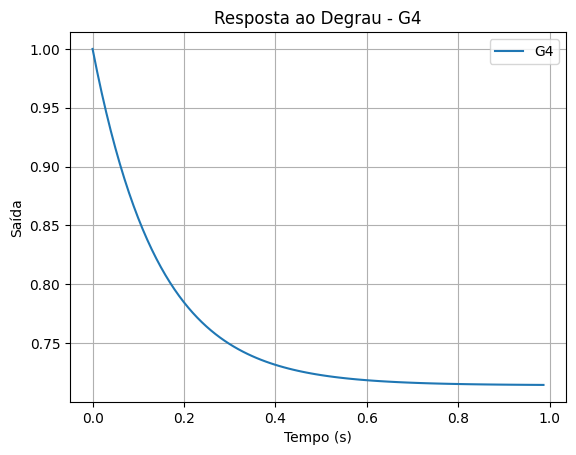


Gráfico salvo em: graficos_resposta/resposta_G4.png

====== MENU ======
1. Criar novo bloco
2. Conectar blocos
3. Mostrar blocos (texto)
4. Simular resposta ao degrau
5. Sair
Escolha uma opção:


In [ ]:
menu()
